In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [5]:
data=pd.read_csv("/content/USArrests.csv")

In [6]:
data.columns

Index(['Unnamed: 0', 'Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')

In [7]:
data.isna().sum()

,0
Unnamed: 0,0
Murder,0
Assault,0
UrbanPop,0
Rape,0


In [8]:
x=data[['Murder','Assault','UrbanPop','Rape']]

In [9]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
  km=KMeans(n_clusters=i,n_init=10)
  km.fit(x)
  css=km.inertia_
  wcss.append(css)

In [10]:
wcss

[355807.82159999997,
 96399.02814449919,
 47964.265357142845,
 34728.629357142854,
 24417.023523809516,
 18850.365333333335,
 15463.47377777778,
 13259.145611111111,
 11125.033809523811,
 10223.840476190479]

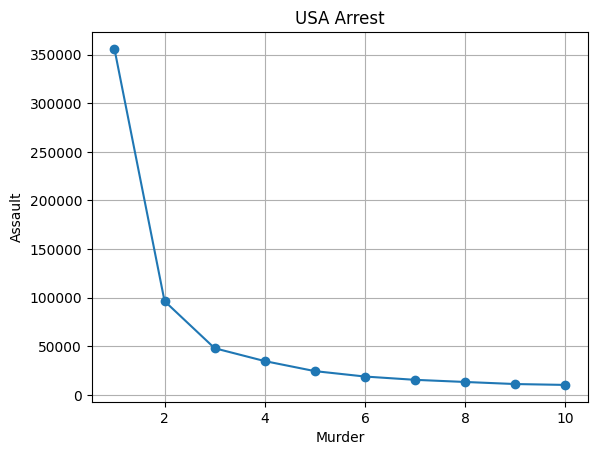

In [11]:
plt.plot(range(1,11),wcss,'o-')
plt.xlabel('Murder')
plt.ylabel('Assault')
plt.title('USA Arrest')
plt.grid()
plt.show()

In [12]:
km=KMeans(n_clusters=5,n_init=10)

In [13]:
km.fit(x)

KMeans(n_clusters=5, n_init=10)

In [14]:
cluster_labels = km.predict(x)

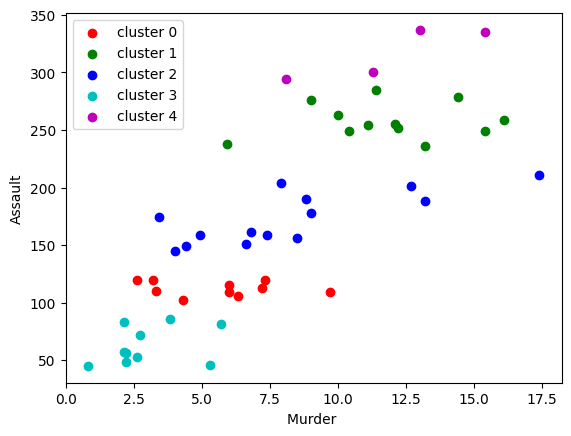

In [15]:
colors = ['r','g','b','c','m']
for i in range(max(cluster_labels)+1):
  cluster_data=x[cluster_labels==i]
  plt.scatter(cluster_data['Murder'],cluster_data['Assault'],c=colors[i],label=f'cluster {i}')
plt.xlabel('Murder ')
plt.ylabel('Assault')
plt.legend()

In [16]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import fcluster

In [17]:
mergings=linkage(x,method="ward")

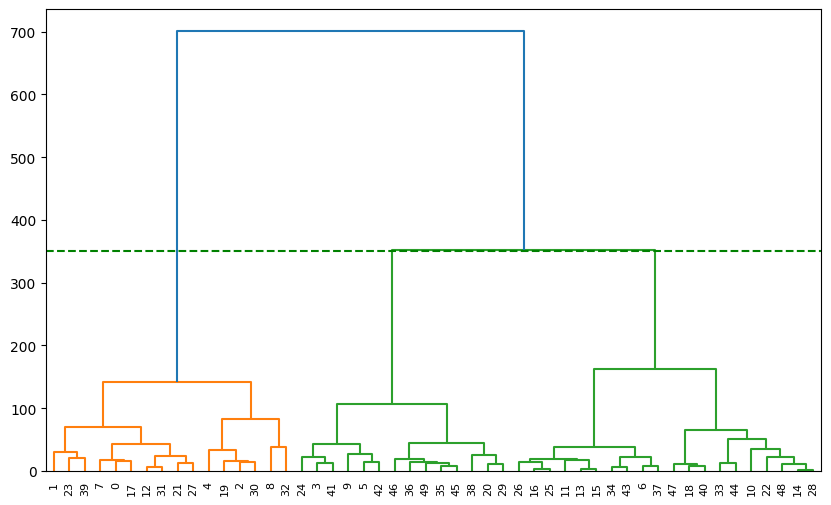

In [18]:
plt.figure(figsize=(10,6))
dendrogram(mergings)
plt.axhline(350,color='green',linestyle='--')
plt.show()

In [19]:
cluster_labels=fcluster(mergings,350,criterion='distance')

In [20]:
cluster_labels

array([1, 1, 1, 2, 1, 2, 3, 1, 1, 2, 3, 3, 1, 3, 3, 3, 3, 1, 3, 1, 2, 1,
       3, 1, 2, 3, 3, 1, 3, 2, 1, 1, 1, 3, 3, 2, 2, 3, 2, 1, 3, 2, 2, 3,
       3, 2, 2, 3, 3, 2], dtype=int32)

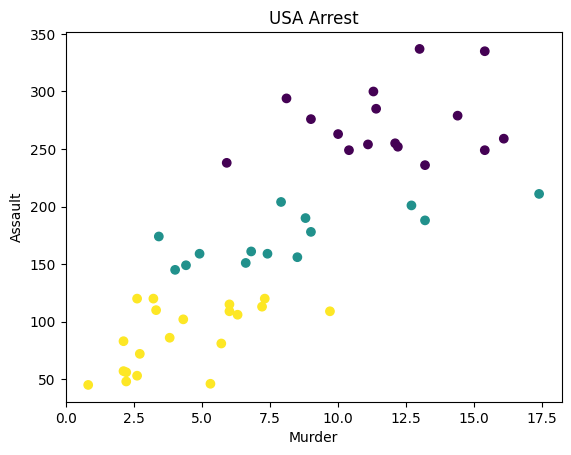

In [21]:
plt.scatter(x['Murder'],x['Assault'],c=cluster_labels)
plt.xlabel('Murder')
plt.ylabel('Assault')
plt.title('USA Arrest')
plt.show()